In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
train      = pd.read_csv("train.csv")
test       = pd.read_csv("test.csv")
submission = pd.read_csv("Sample_Submission_Tm9Lura.csv")

In [63]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [64]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [65]:
frames = [train, test]
black = pd.concat(frames)

In [66]:
black.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


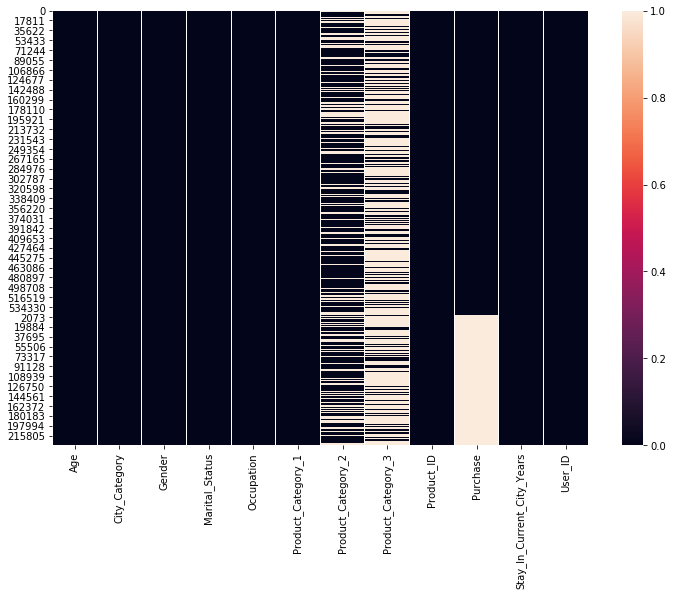

In [67]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(black.isnull())                              #this will give null values - white horizontal lines are null values.

In [68]:
black['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [69]:
#converted range values to single one.

black.loc[black['Age'] == '0-17' , 'Age'] = 17
black.loc[black['Age'] == '18-25', 'Age'] = 21
black.loc[black['Age'] == '26-35' , 'Age'] = 30
black.loc[black['Age'] == '36-45' , 'Age'] = 40
black.loc[black['Age'] == '46-50' , 'Age'] = 48
black.loc[black['Age'] == '51-55' , 'Age'] = 52
black.loc[black['Age'] == '55+' , 'Age'] = 58

In [70]:
black['Age'].value_counts()

30    313015
40    156724
21    141953
48     65278
52     54784
58     30579
17     21334
Name: Age, dtype: int64

In [71]:
black['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [72]:
black.loc[black['Stay_In_Current_City_Years'] == '4+' , 'Stay_In_Current_City_Years'] = 8

In [73]:
black['Stay_In_Current_City_Years'].value_counts()

1    276425
2    145427
3    135428
8    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [74]:
black['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [75]:
#dummies for categorical variable 

Sex = pd.get_dummies(black['Gender'], drop_first= True)
City = pd.get_dummies(black['City_Category'], drop_first= True)

In [76]:
black = pd.concat([black, Sex, City] , axis=1)

In [77]:
black['Marital_Status'].value_counts()

0    462538
1    321129
Name: Marital_Status, dtype: int64

In [78]:
black['Occupation'].value_counts()

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

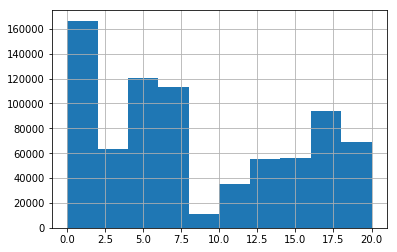

In [79]:
black['Occupation'].hist()

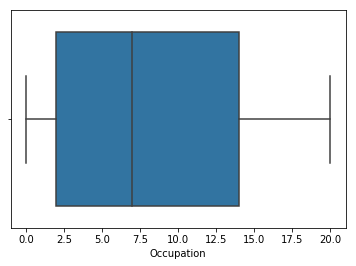

In [80]:
sns.boxplot(black['Occupation'])

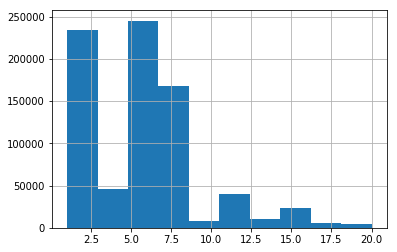

In [81]:
black['Product_Category_1'].hist()

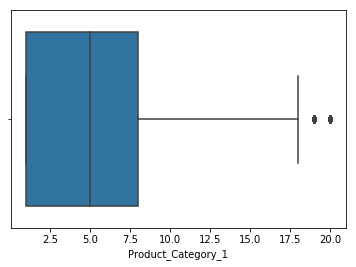

In [82]:
sns.boxplot(black['Product_Category_1'])

In [83]:
p1 = np.log(black['Product_Category_1'])

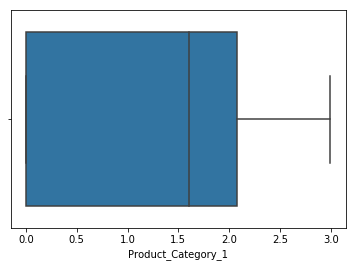

In [84]:
sns.boxplot(p1)

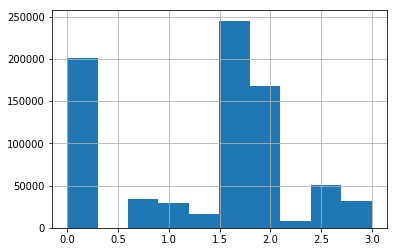

In [85]:
p1.hist()

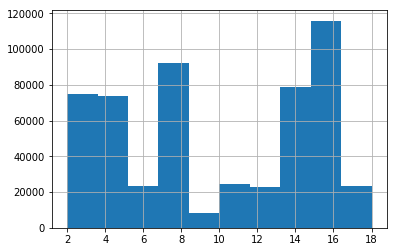

In [86]:
black['Product_Category_2'].hist()

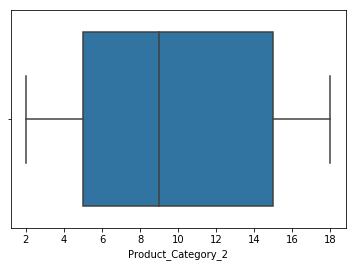

In [87]:
sns.boxplot(black['Product_Category_2'])

In [88]:
black['Product_Category_2'].median()

9.0

In [89]:
black['Product_Category_2'] = black['Product_Category_2'].fillna(black['Product_Category_2'].median())

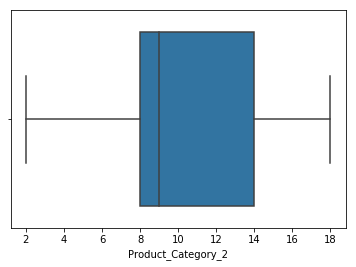

In [90]:
sns.boxplot(black['Product_Category_2'])

In [91]:
p2 = np.log(black['Product_Category_2'])

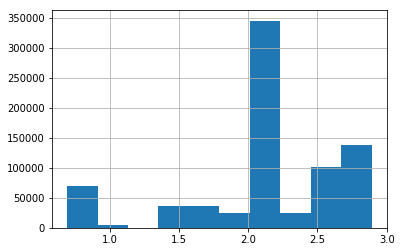

In [92]:
p2.hist()

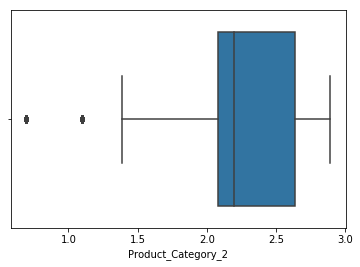

In [93]:
sns.boxplot(p2)

In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
le = LabelEncoder()

In [96]:
black['Product_ID'] = le.fit_transform(black['Product_ID'])

In [97]:
black.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,M,B,C
0,17,A,F,0,10,3,9.0,NaN,684,8370.0,2,1000001,0,0,0
1,17,A,F,0,10,1,6.0,14.0,2406,15200.0,2,1000001,0,0,0
2,17,A,F,0,10,12,9.0,NaN,868,1422.0,2,1000001,0,0,0
3,17,A,F,0,10,12,14.0,NaN,844,1057.0,2,1000001,0,0,0
4,58,C,M,0,16,8,9.0,NaN,2769,7969.0,8,1000002,1,0,1


In [98]:
black = black.drop(['City_Category','Gender','Product_Category_3'],axis=1)

In [99]:
Y = black['Purchase'][0:550068]

In [100]:
black = black.drop('Purchase',axis=1)

In [101]:
black = black.astype('int64')

In [102]:
train.shape

(550068, 12)

In [103]:
test.shape

(233599, 11)

In [104]:
X_tr = black[0:550068]

In [105]:
X_te = black[550068:]

In [106]:
X_tr.head()

,Age,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_ID,Stay_In_Current_City_Years,User_ID,M,B,C
0,17,0,10,3,9,684,2,1000001,0,0,0
1,17,0,10,1,6,2406,2,1000001,0,0,0
2,17,0,10,12,9,868,2,1000001,0,0,0
3,17,0,10,12,14,844,2,1000001,0,0,0
4,58,0,16,8,9,2769,8,1000002,1,0,1


In [107]:
X_te.head()

,Age,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_ID,Stay_In_Current_City_Years,User_ID,M,B,C
0,48,1,7,1,11,1216,2,1000004,1,1,0
1,30,0,17,3,5,1063,0,1000009,1,0,1
2,40,1,1,5,14,2799,8,1000010,0,1,0
3,40,1,1,4,9,1379,8,1000010,0,1,0
4,30,0,1,4,5,535,1,1000011,0,0,1


In [108]:
Y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
sc = StandardScaler()

In [111]:
X_train = sc.fit_transform(X_tr)

In [112]:
X_test = sc.transform(X_te)

In [113]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators =120)

In [114]:
rfr.fit(X_train, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [115]:
pred= rfr.predict(X_test)

In [116]:
submission

,User_ID,Product_ID,Purchase


In [117]:
lp = pd.DataFrame(pred, columns=['Purchase']) 

In [118]:
ld = test['User_ID']

In [119]:
lk = test['Product_ID']

In [120]:
submit = pd.concat([ld,lk, lp], axis=1)

In [121]:
submit.to_csv('blacksolution3.csv')

In [ ]:
#this gives me the rmse value = 2742.92